# Mean Filter

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.util import random_noise
from scipy import ndimage

from bcd.utils.image import convert_uint8


In [2]:
FP_ORIG = "jbook/figures/mammogram.png"
CMAP = 'gray'

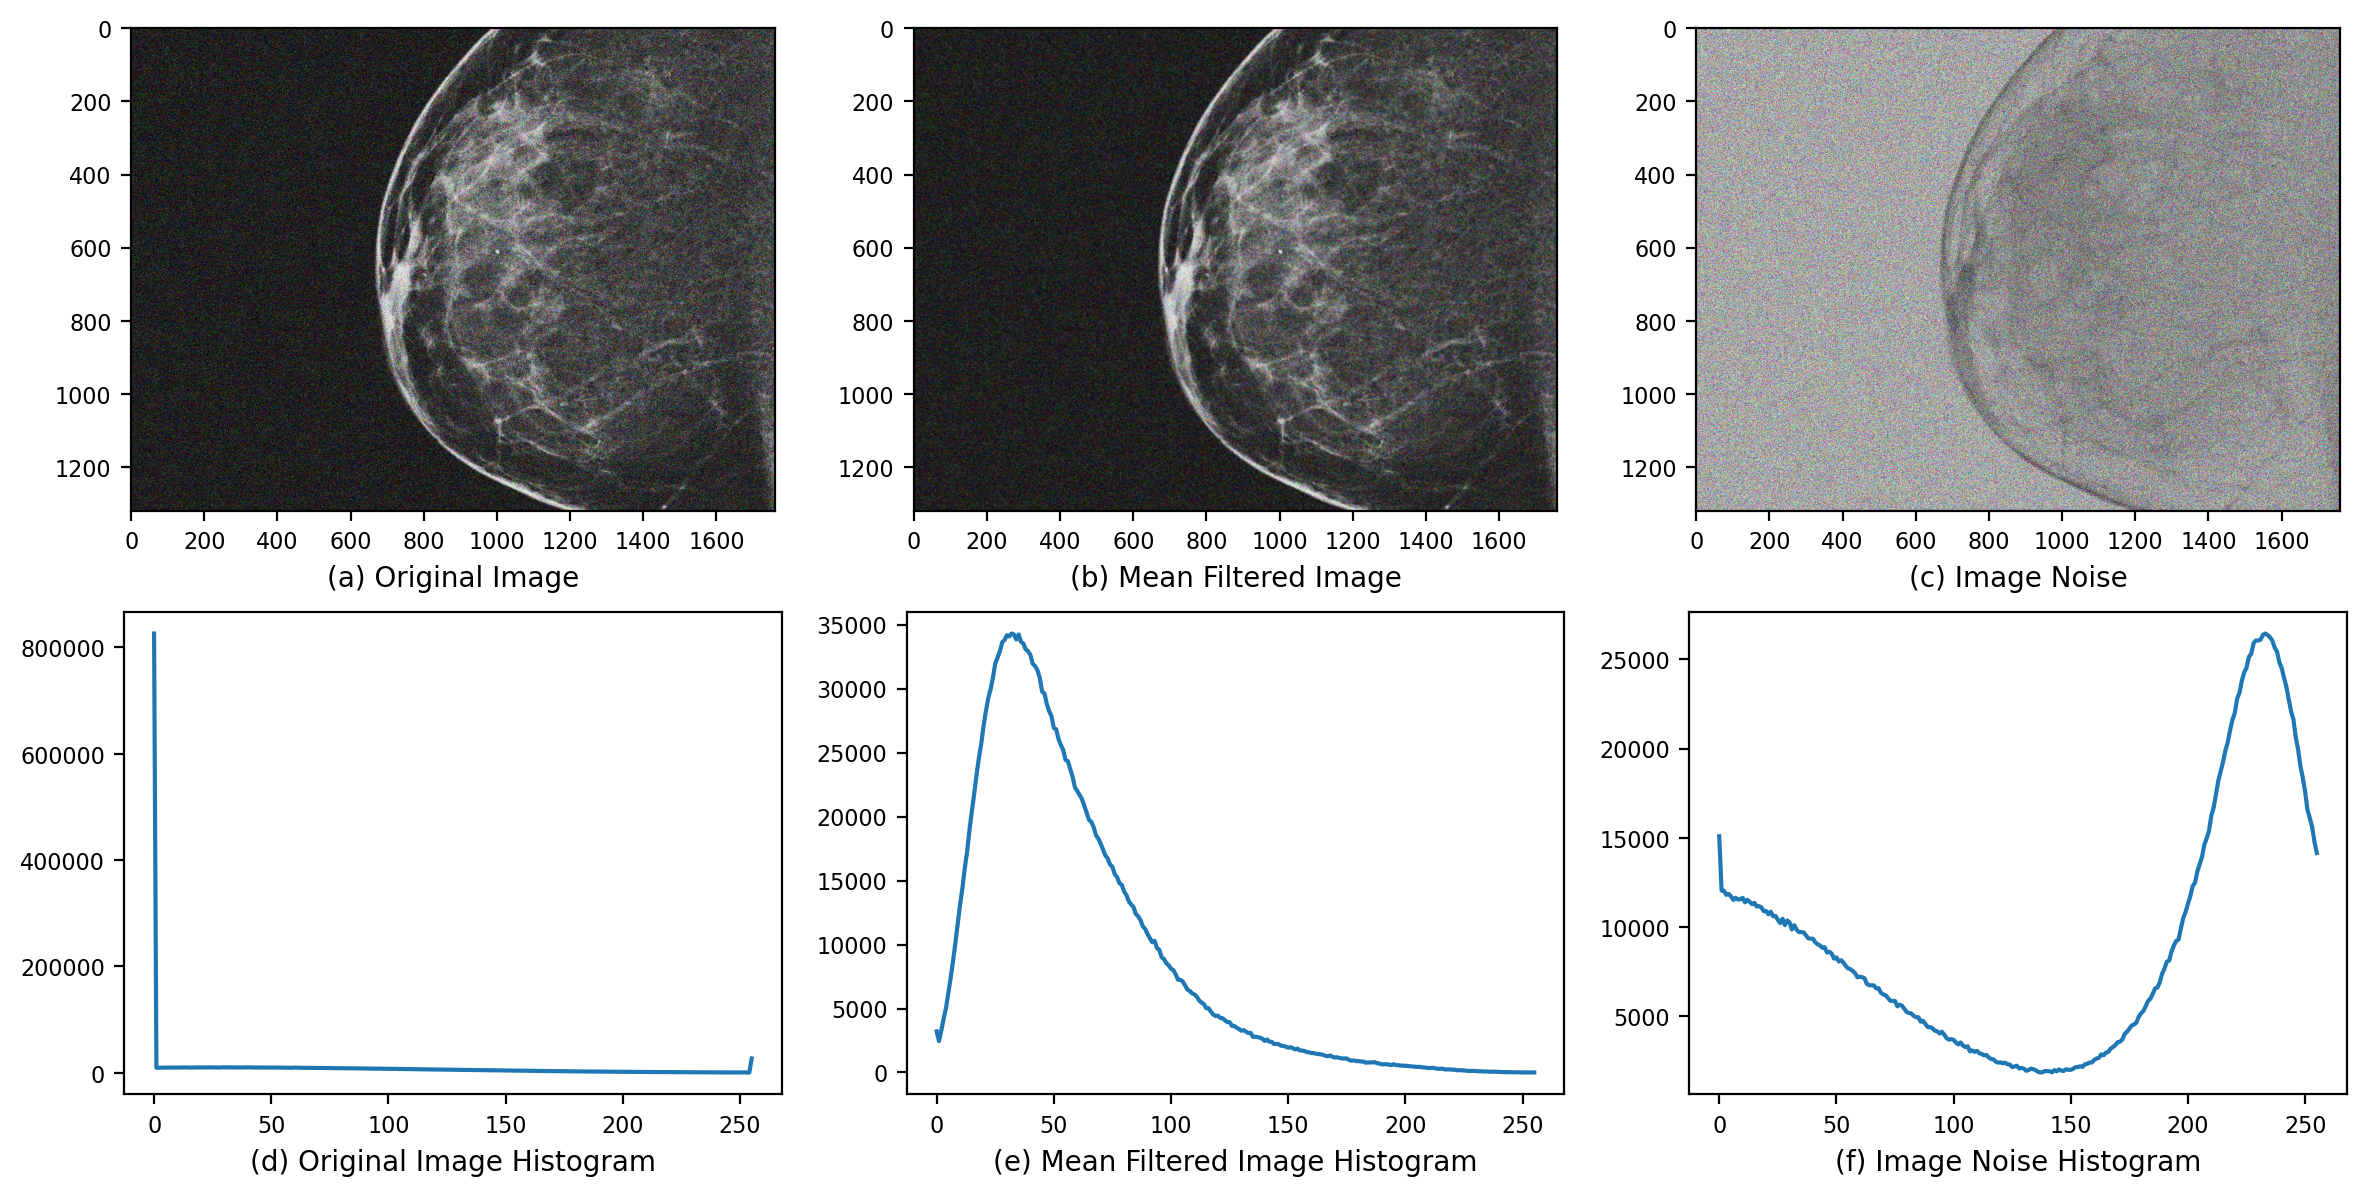

In [25]:
# Obtain the source image
orig = cv2.imread(FP_ORIG)

# Add random Gaussian noise with zero mean and variance of 0.1
img_gaussian = random_noise(orig, mode='gaussian', mean=0,var=0.1)
img_gaussian = convert_uint8(img_gaussian)

# Apply the 3x3 mean filter kernel 
img_filtered = cv2.blur(img_gaussian, (3,3))

# Subtract the filtered 
img_noise = img_gaussian - img_filtered

# Compute histograms
img_gaussian_hist = cv2.calcHist([img_gaussian], [0], None, [256], [0,256])
img_filtered_hist = cv2.calcHist([img_filtered], [0], None, [256], [0,256])
img_noise_hist = cv2.calcHist([img_noise], [0], None, [256], [0,256])

# Create Figure object
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6), dpi=200)

# Show images
_ = ax[0,0].imshow(img_gaussian, cmap=CMAP)
_ = ax[0,0].set_xlabel('(a) Original Image', fontsize=10)

_ = ax[0,1].imshow(img_filtered, cmap=CMAP)
_ = ax[0,1].set_xlabel('(b) Mean Filtered Image', fontsize=10)

_ = ax[0,2].imshow(img_noise, cmap=CMAP)
_ = ax[0,2].set_xlabel('(c) Image Noise', fontsize=10)

# Show histograms
_ = ax[1,0].plot(img_gaussian_hist)
_ = ax[1,0].set_xlabel("(d) Original Image Histogram", fontsize=10)

_ = ax[1,1].plot(img_filtered_hist)
_ = ax[1,1].set_xlabel("(e) Mean Filtered Image Histogram", fontsize=10)

_ = ax[1,2].plot(img_noise_hist)
_ = ax[1,2].set_xlabel("(f) Image Noise Histogram", fontsize=10)

plt.tight_layout()
plt.show()
fig.savefig("/home/john/projects/bcd/jbook/figures/mean_filter.png")

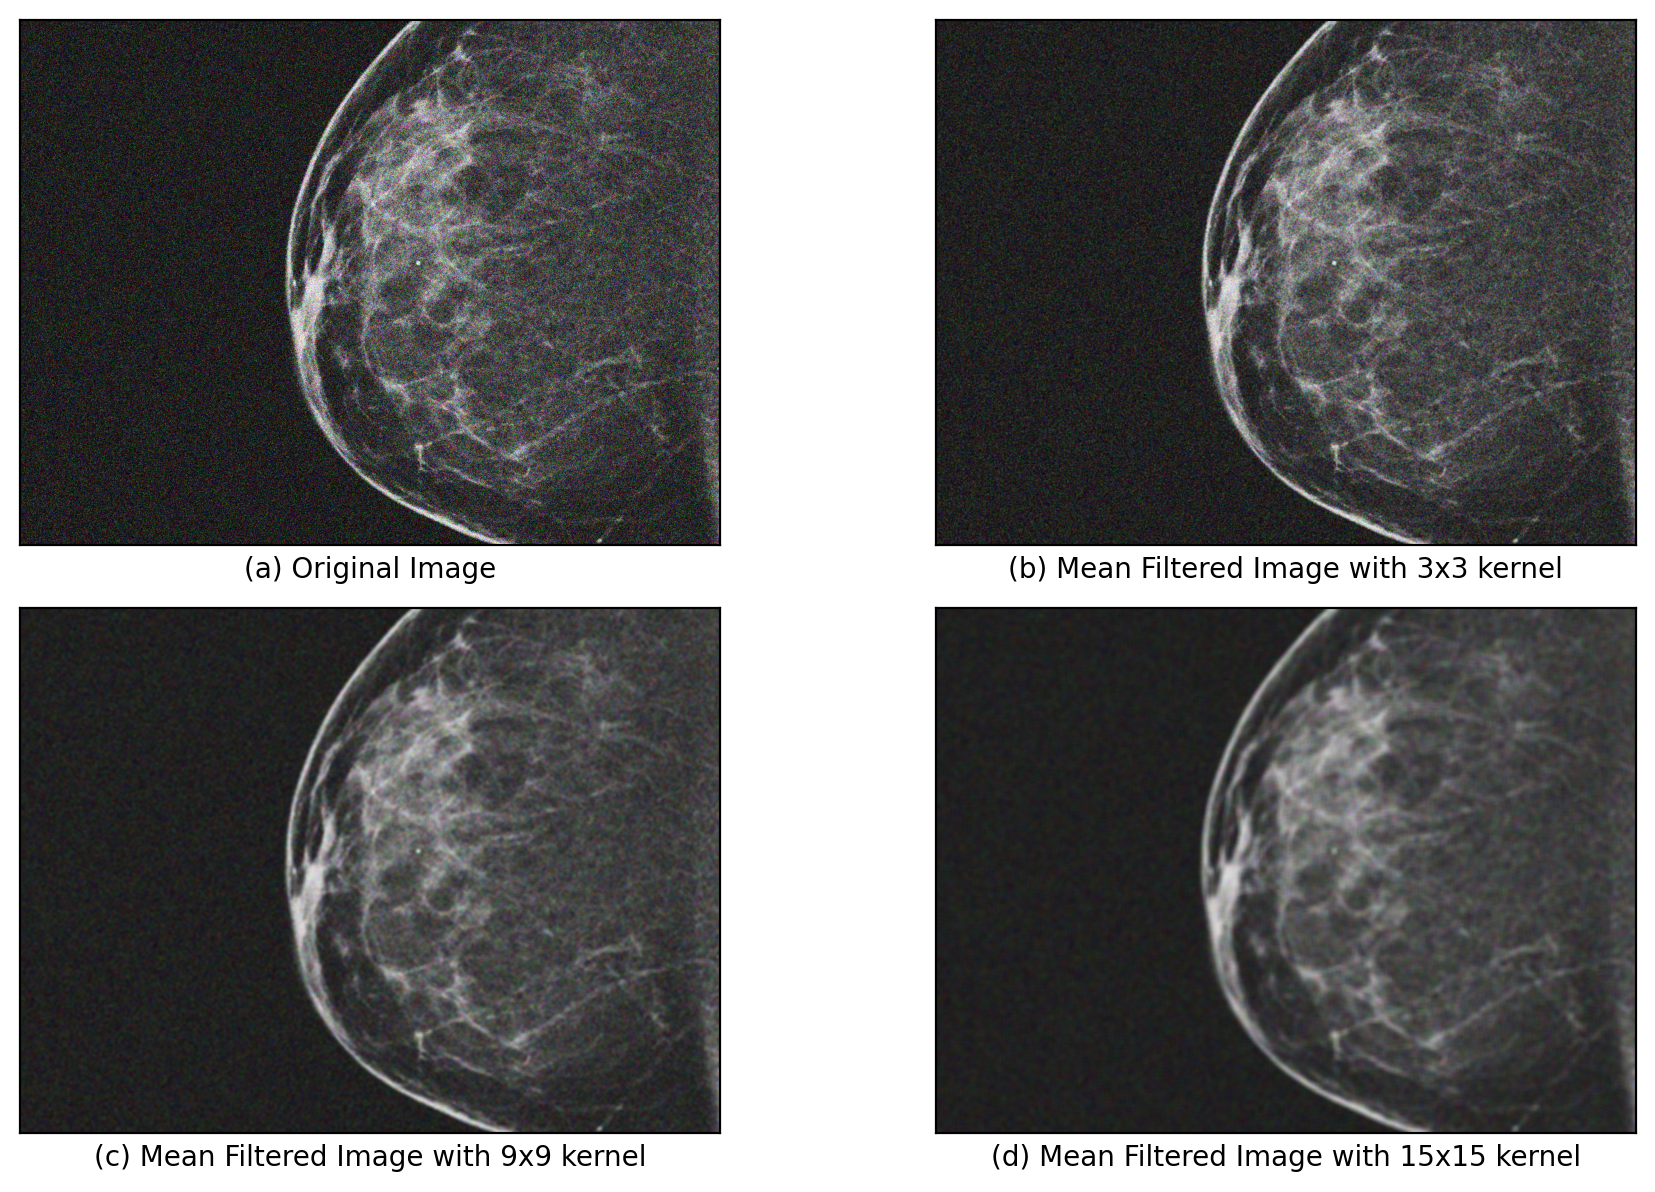

In [7]:
# Obtain the source image
orig = cv2.imread(FP_ORIG)

# Add random Gaussian noise with zero mean and variance of 0.1
img_gaussian = random_noise(orig, mode='gaussian', mean=0,var=0.1)
img_gaussian = convert_uint8(img_gaussian)

# Create images with varying kernel sizes.
img_1 = cv2.blur(img_gaussian, (3,3))
img_2 = cv2.blur(img_gaussian, (9,9))
img_3 = cv2.blur(img_gaussian, (15,15))

# Create Figure object
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6), dpi=200)

# Show images
_ = ax[0,0].imshow(img_gaussian, cmap=CMAP)
_ = ax[0,0].set_xlabel('(a) Original Image', fontsize=10)
_ = ax[0,0].set_xticks([])
_ = ax[0,0].set_yticks([])

_ = ax[0,1].imshow(img_1, cmap=CMAP)
_ = ax[0,1].set_xlabel('(b) Mean Filtered Image with 3x3 kernel', fontsize=10)
_ = ax[0,1].set_xticks([])
_ = ax[0,1].set_yticks([])

_ = ax[1,0].imshow(img_2, cmap=CMAP)
_ = ax[1,0].set_xlabel('(c) Mean Filtered Image with 9x9 kernel', fontsize=10)
_ = ax[1,0].set_xticks([])
_ = ax[1,0].set_yticks([])

_ = ax[1,1].imshow(img_3, cmap=CMAP)
_ = ax[1,1].set_xlabel('(d) Mean Filtered Image with 15x15 kernel', fontsize=10)
_ = ax[1,1].set_xticks([])
_ = ax[1,1].set_yticks([])

plt.tight_layout()
plt.show()